In [6]:
import pandas as pd
# Read in the CSV file and analyse the data.
votes = pd.read_csv("114_congress.csv")
print(votes.shape)
print(pd.value_counts(votes.iloc[:,3:].values.ravel()))

(100, 18)
1.0    803
0.0    669
0.5     28
dtype: int64


In [14]:
from sklearn.cluster import KMeans
#The KMeans learn algorithm is implemented in the scikit-learn library
#Create a KMeans learn model on our data using two clusters at first.
kmeans_model = KMeans(n_clusters=2, random_state=1)
#Features dataframe to train the model
features = votes.iloc[:, 3:]
#Train the model
kmeans_model.fit(features)
#These are our fitted labels for clusters -- first cluster has label 0 and second has label 1
labels = kmeans_model.labels_
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [27]:
#Let's explore people in the wrong cluster
votes["label"] = labels
print(votes[(labels == 1) & (votes["party"] == "D")])

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  labels  label  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0       1      1  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0       1      1  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5       1      1  


Reid has abstained a lot which has changed his cluster and Manchin and Heitkamp are genuinly unconventional from their parties.

Let's explore our clusters little bit more by plotting them out.
This dataset has 15 feature columns and each column can be used as dimension. Since we can't use 15 dimension and don't want to drop any column, therefore, we'll use principal component analysis to reduce these features into two feature columns.

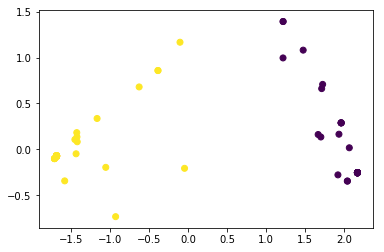

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_2 = PCA(2)
#Turn the vote data into two columns with PCA
plot_columns = pca_2.fit_transform(votes.iloc[:,3:])
#Plot senators based on two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=votes["label"])
plt.show()